In [1]:
import os 
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from scipy.stats import gaussian_kde
import networkx as nx

import seaborn as sns
import jenkspy

In [2]:
data_dir = "../../data/"
res_dir = "../b-calculation/results/"

In [3]:
region = gpd.read_file(data_dir+"region-2014/MP14_REGION_WEB_PL.shp")
parea = gpd.read_file(data_dir+"planning-area-2014/MP14_PLNG_AREA_WEB_PL.shp")

In [4]:
subzone_fp = os.path.join(data_dir, "subzone-2014", "MP14_SUBZONE_WEB_PL.shp")
subzone = gpd.read_file(subzone_fp)
subzone.head()

,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,FMEL_UPD_D,X_ADDR,Y_ADDR,SHAPE_Leng,SHAPE_Area,geometry
0,1,1,MARINA SOUTH,MSSZ01,Y,MARINA SOUTH,MS,CENTRAL REGION,CR,5ED7EB253F99252E,2014-12-05,31595.8357,29220.1873,5267.381024,1.630379e+06,"POLYGON ((31495.560 30140.012, 31980.957 29671..."
1,2,1,PEARL'S HILL,OTSZ01,Y,OUTRAM,OT,CENTRAL REGION,CR,8C7149B9EB32EEFC,2014-12-05,28679.0634,29782.0519,3506.107376,5.598162e+05,"POLYGON ((29092.275 30021.888, 29119.641 30006..."
2,3,3,BOAT QUAY,SRSZ03,Y,SINGAPORE RIVER,SR,CENTRAL REGION,CR,C35FEFF02B13E0E5,2014-12-05,29654.9594,29974.6553,1740.925766,1.608075e+05,"POLYGON ((29932.332 29879.120, 29947.317 29858..."
3,4,8,HENDERSON HILL,BMSZ08,N,BUKIT MERAH,BM,CENTRAL REGION,CR,3775D82C5DDBEFBD,2014-12-05,26782.8261,29933.7651,3313.624904,5.954289e+05,"POLYGON ((27131.276 30059.727, 27088.334 29709..."
4,5,3,REDHILL,BMSZ03,N,BUKIT MERAH,BM,CENTRAL REGION,CR,85D9ABEF0A40678F,2014-12-05,26201.9580,30005.7035,2825.594099,3.874294e+05,"POLYGON ((26451.027 30396.458, 26440.474 30361..."


In [6]:
com_res = pd.read_csv(res_dir+"mapequation_com_entropy_G.csv", index_col=0)
com_res.head()

,node,level_1_weekday,level_1_weekend,weekday_com_ent_in,weekday_com_ent_out,weekend_com_ent_in,weekend_com_ent_out
ind,,,,,,,
0,NEWTON CIRCUS,1,1,0.660688,0.618028,0.649526,0.595412
1,BOULEVARD,1,1,0.778886,0.751121,0.780433,0.728454
2,CHINATOWN,1,1,0.746530,0.754246,0.714408,0.728074
3,MOULMEIN,1,1,0.744090,0.732001,0.710449,0.652052
4,CITY HALL,1,1,0.759932,0.761807,0.763656,0.770766


In [7]:
ks_res = pd.read_csv(res_dir+"k_shell_decomposition_result_entropy.csv", index_col=0)
ks_res.head()

,node,weekday_in_core,weekday_out_core,weekend_in_core,weekend_out_core,weekday_in_core_lvl,weekday_out_core_lvl,weekend_in_core_lvl,weekend_out_core_lvl,weekday_ksc_ent_in,weekday_ksc_ent_out,weekend_ksc_ent_in,weekend_ksc_ent_out
ind,,,,,,,,,,,,,
0,ADMIRALTY,2797,2668,2747,2593,0,0,0,0,0.990890,0.771334,0.999949,0.783552
1,AIRPORT ROAD,681,654,258,250,0,0,0,0,0.665975,0.100550,0.683295,0.324450
2,ALEXANDRA HILL,5641,5374,5250,5005,1,1,1,1,0.751160,0.617682,0.778628,0.785826
3,ALEXANDRA NORTH,1808,2017,1419,1476,0,0,0,0,0.962353,0.896500,0.996685,0.961128
4,ALJUNIED,7385,7318,6252,6239,1,1,1,1,0.320833,0.406824,0.261917,0.468840


In [8]:
stat_res = pd.read_csv(res_dir+"node_density_stat_normalized.csv", index_col=0)
stat_res.head()

,in_degree_weekday,out_degree_weekday,PageRank_weekday,HITS_hub_weekday,HITS_authority_weekday,in_degree_weekend,out_degree_weekend,PageRank_weekend,HITS_hub_weekend,HITS_authority_weekend
node,,,,,,,,,,
ADMIRALTY,0.048551,0.036933,0.060612,0.028214,0.028508,0.061199,0.045808,0.067892,0.038888,0.038550
AIRPORT ROAD,0.006487,0.006623,0.005869,0.005507,0.005368,0.000287,0.001161,0.000182,0.000832,0.000619
ALEXANDRA HILL,0.130663,0.107470,0.135408,0.032508,0.047346,0.132178,0.098367,0.136138,0.039150,0.055265
ALEXANDRA NORTH,0.009226,0.015243,0.009854,0.004846,0.001865,0.006561,0.009277,0.006795,0.003378,0.002542
ALJUNIED,0.562586,0.544546,0.475933,0.416580,0.477250,0.663674,0.638384,0.547525,0.562194,0.680763


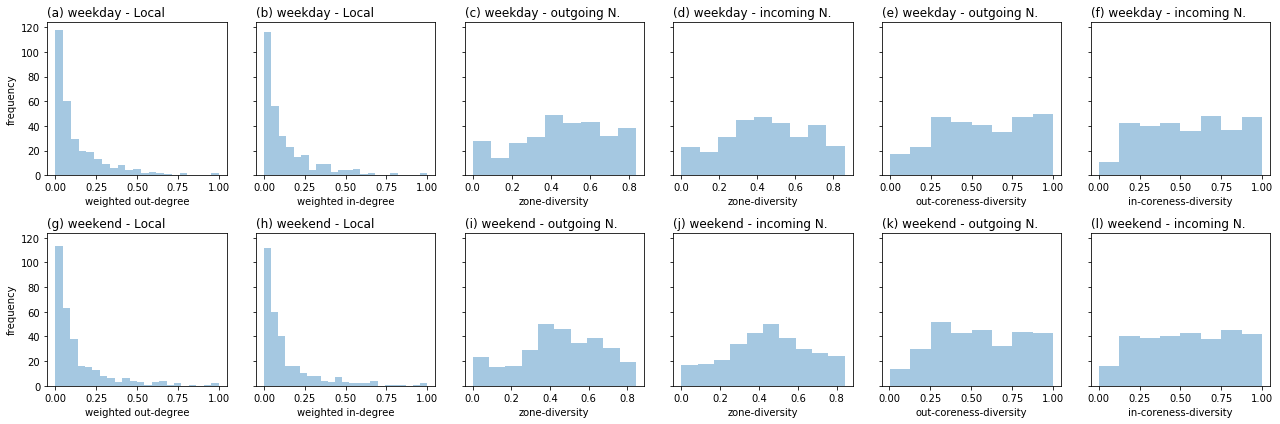

In [9]:
fig, axg = plt.subplots(2, 6, figsize=(18,6), sharey=True)
axs = axg.flatten()

columns = ["out_degree_weekday", "in_degree_weekday", "weekday_com_ent_out", "weekday_com_ent_in", "weekday_ksc_ent_out", "weekday_ksc_ent_in", 
           "out_degree_weekend", "in_degree_weekend", "weekend_com_ent_out", "weekend_com_ent_in", "weekend_ksc_ent_out", "weekend_ksc_ent_in"]
dfs = [stat_res, stat_res, com_res, com_res, ks_res, ks_res] + [stat_res, stat_res, com_res, com_res, ks_res, ks_res]

for i in range(len(columns)):
    df = dfs[i]
    col = columns[i]
    ax = axs[i]
    sns.distplot(df[col], ax=ax, kde=False)

labs = "abcdefghijkl"
labs2 = [ "weekday - Local", "weekday - Local", "weekday - outgoing N.", "weekday - incoming N.", "weekday - outgoing N.", "weekday - incoming N.",
          "weekend - Local", "weekend - Local", "weekend - outgoing N.", "weekend - incoming N.", "weekend - outgoing N.", "weekend - incoming N." ]
xlabs = ["weighted out-degree", "weighted in-degree", "zone-diversity", "zone-diversity", "out-coreness-diversity", "in-coreness-diversity", 
         "weighted out-degree", "weighted in-degree", "zone-diversity", "zone-diversity", "out-coreness-diversity", "in-coreness-diversity"]

for i in range(12):
    ax = axs[i]
    ax.set_title("({}) {}".format(labs[i], labs2[i]), loc="left")
    ax.set_xlabel(xlabs[i])
    
axg[0][0].set_ylabel("frequency")
axg[1][0].set_ylabel("frequency")

plt.tight_layout()


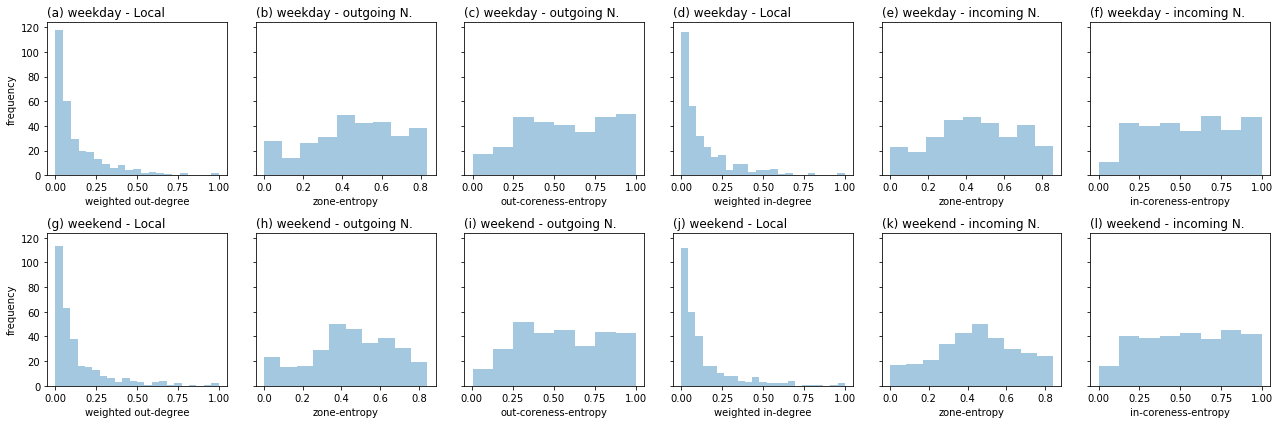

In [10]:
fig, axg = plt.subplots(2, 6, figsize=(18,6), sharey=True)
axs = axg.flatten()

columns = ["out_degree_weekday", "weekday_com_ent_out", "weekday_ksc_ent_out", 
           "in_degree_weekday", "weekday_com_ent_in", "weekday_ksc_ent_in", 
           "out_degree_weekend", "weekend_com_ent_out", "weekend_ksc_ent_out", 
           "in_degree_weekend", "weekend_com_ent_in", "weekend_ksc_ent_in"]

dfs = [stat_res, com_res, ks_res, stat_res, com_res, ks_res] + [stat_res, com_res, ks_res, stat_res, com_res, ks_res]

for i in range(len(columns)):
    df = dfs[i]
    col = columns[i]
    ax = axs[i]
    sns.distplot(df[col], ax=ax, kde=False)

labs = "abcdefghijkl"
labs2 = [ "weekday - Local", "weekday - outgoing N.", "weekday - outgoing N.", 
          "weekday - Local", "weekday - incoming N.", "weekday - incoming N.",
          "weekend - Local", "weekend - outgoing N.", "weekend - outgoing N.", 
          "weekend - Local", "weekend - incoming N.", "weekend - incoming N." ]
xlabs = ["weighted out-degree", "zone-entropy", "out-coreness-entropy", 
         "weighted in-degree" , "zone-entropy", "in-coreness-entropy" , 
         "weighted out-degree", "zone-entropy", "out-coreness-entropy", 
         "weighted in-degree" , "zone-entropy", "in-coreness-entropy"  ]

for i in range(12):
    ax = axs[i]
    ax.set_title("({}) {}".format(labs[i], labs2[i]), loc="left")
    ax.set_xlabel(xlabs[i])

for i in range(2):
    axg[i][0].set_ylabel("frequency")
    
plt.tight_layout()
#plt.savefig("density_and_diversity.png", dpi=100, bbox_inches="tight")

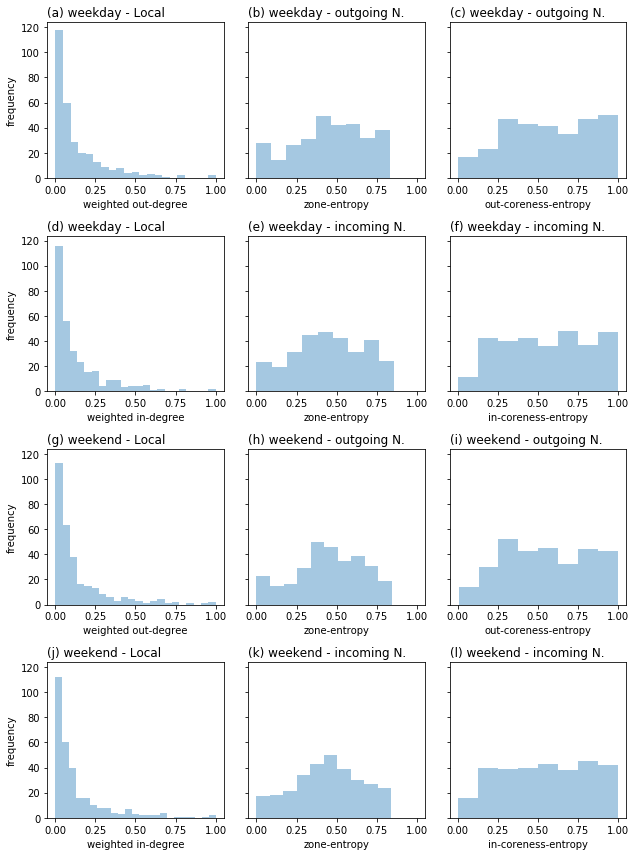

In [11]:
fig, axg = plt.subplots(4, 3, figsize=(9,12), sharey=True, sharex=False)
axs = axg.flatten()

columns = ["out_degree_weekday", "weekday_com_ent_out", "weekday_ksc_ent_out", 
           "in_degree_weekday", "weekday_com_ent_in", "weekday_ksc_ent_in", 
           "out_degree_weekend", "weekend_com_ent_out", "weekend_ksc_ent_out", 
           "in_degree_weekend", "weekend_com_ent_in", "weekend_ksc_ent_in"]

dfs = [stat_res, com_res, ks_res, stat_res, com_res, ks_res] + [stat_res, com_res, ks_res, stat_res, com_res, ks_res]

for i in range(len(columns)):
    df = dfs[i]
    col = columns[i]
    ax = axs[i]
    sns.distplot(df[col], ax=ax, kde=False)

labs = "abcdefghijkl"
labs2 = [ "weekday - Local", "weekday - outgoing N.", "weekday - outgoing N.", 
          "weekday - Local", "weekday - incoming N.", "weekday - incoming N.",
          "weekend - Local", "weekend - outgoing N.", "weekend - outgoing N.", 
          "weekend - Local", "weekend - incoming N.", "weekend - incoming N." ]
xlabs = ["weighted out-degree", "zone-entropy", "out-coreness-entropy", 
         "weighted in-degree" , "zone-entropy", "in-coreness-entropy" , 
         "weighted out-degree", "zone-entropy", "out-coreness-entropy", 
         "weighted in-degree" , "zone-entropy", "in-coreness-entropy"  ]

for i in range(12):
    ax = axs[i]
    ax.set_title("({}) {}".format(labs[i], labs2[i]), loc="left")
    ax.set_xlabel(xlabs[i])
    ax.set_xlim([-0.05,1.05])

for i in range(4):
    axg[i][0].set_ylabel("frequency")
    
plt.tight_layout()
plt.savefig("../b-calculation/figs/density_and_diversity.png", dpi=100, bbox_inches="tight")

In [12]:
stat_res2 = stat_res.reset_index()

In [13]:
subzone4 = subzone.merge(stat_res2, left_on="SUBZONE_N", right_on="node")
len(subzone4)

303

In [14]:
subzone2 = subzone.merge(com_res, left_on="SUBZONE_N", right_on="node")
len(subzone2)

303

In [15]:
subzone3 = subzone.merge(ks_res, left_on="SUBZONE_N", right_on="node")
len(subzone3)

303

In [16]:
print(subzone2.columns)
subzone2.head()

Index(['OBJECTID', 'SUBZONE_NO', 'SUBZONE_N', 'SUBZONE_C', 'CA_IND',
       'PLN_AREA_N', 'PLN_AREA_C', 'REGION_N', 'REGION_C', 'INC_CRC',
       'FMEL_UPD_D', 'X_ADDR', 'Y_ADDR', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry', 'node', 'level_1_weekday', 'level_1_weekend',
       'weekday_com_ent_in', 'weekday_com_ent_out', 'weekend_com_ent_in',
       'weekend_com_ent_out'],
      dtype='object')


,OBJECTID,SUBZONE_NO,SUBZONE_N,SUBZONE_C,CA_IND,PLN_AREA_N,PLN_AREA_C,REGION_N,REGION_C,INC_CRC,...,SHAPE_Leng,SHAPE_Area,geometry,node,level_1_weekday,level_1_weekend,weekday_com_ent_in,weekday_com_ent_out,weekend_com_ent_in,weekend_com_ent_out
0,1,1,MARINA SOUTH,MSSZ01,Y,MARINA SOUTH,MS,CENTRAL REGION,CR,5ED7EB253F99252E,...,5267.381024,1.630379e+06,"POLYGON ((31495.560 30140.012, 31980.957 29671...",MARINA SOUTH,1,1,0.000000,0.000000,0.000000,0.000000
1,2,1,PEARL'S HILL,OTSZ01,Y,OUTRAM,OT,CENTRAL REGION,CR,8C7149B9EB32EEFC,...,3506.107376,5.598162e+05,"POLYGON ((29092.275 30021.888, 29119.641 30006...",PEARL'S HILL,1,1,0.414489,0.575419,0.459558,0.604774
2,3,3,BOAT QUAY,SRSZ03,Y,SINGAPORE RIVER,SR,CENTRAL REGION,CR,C35FEFF02B13E0E5,...,1740.925766,1.608075e+05,"POLYGON ((29932.332 29879.120, 29947.317 29858...",BOAT QUAY,1,1,0.474471,0.345749,0.434712,0.408290
3,4,8,HENDERSON HILL,BMSZ08,N,BUKIT MERAH,BM,CENTRAL REGION,CR,3775D82C5DDBEFBD,...,3313.624904,5.954289e+05,"POLYGON ((27131.276 30059.727, 27088.334 29709...",HENDERSON HILL,8,8,0.377895,0.381683,0.405037,0.359725
4,5,3,REDHILL,BMSZ03,N,BUKIT MERAH,BM,CENTRAL REGION,CR,85D9ABEF0A40678F,...,2825.594099,3.874294e+05,"POLYGON ((26451.027 30396.458, 26440.474 30361...",REDHILL,8,8,0.757801,0.724305,0.752768,0.716337


In [17]:
#subzone["X_ADDR"]

In [18]:
def quantile(alist, cut=4):
    b0 = 1./cut
    bs = [ i*b0 for i in range(1, cut+1) ]
    breaks = [ np.quantile(alist, b) for b in bs ]
    print(bs, breaks)
    break_list = []
    for a in alist:
        
        i = 0
        while not(a<=breaks[i]):
            i+=1
        """
        i = cut-1
        while not(a>=breaks[i]):
            i-=1
        """
        break_list.append(i)
        
    return break_list

four_color = sns.color_palette("RdBu_r", 4)

[0.25, 0.5, 0.75, 1.0] [0.025112748034446113, 0.07346919547178, 0.18993102261575753, 1.0]
[0.25, 0.5, 0.75, 1.0] [0.30846701519416997, 0.4700387185230276, 0.6289078281815389, 0.8338498488464692]
[0.25, 0.5, 0.75, 1.0] [0.3460622036968456, 0.5725532342171017, 0.8024726003759679, 0.999987674431568]
[0.25, 0.5, 0.75, 1.0] [0.025409031870323593, 0.07101702607465712, 0.18143871491723262, 1.0]
[0.25, 0.5, 0.75, 1.0] [0.29254976594420995, 0.4524879868319494, 0.6490385359552537, 0.8595635851826637]
[0.25, 0.5, 0.75, 1.0] [0.32601148225695087, 0.54557415757864, 0.7735226644719497, 0.9999961863587901]
[0.25, 0.5, 0.75, 1.0] [0.022248042043385464, 0.07104818024803079, 0.17745503921542552, 1.0]
[0.25, 0.5, 0.75, 1.0] [0.3197677669707505, 0.4464666849668644, 0.6133950239626413, 0.844520094687989]
[0.25, 0.5, 0.75, 1.0] [0.3380976543438276, 0.5262885306986919, 0.782555786029535, 0.9999955731051078]
[0.25, 0.5, 0.75, 1.0] [0.02264804626899613, 0.06982703711909201, 0.17203772440762022, 1.0]
[0.25, 0.5

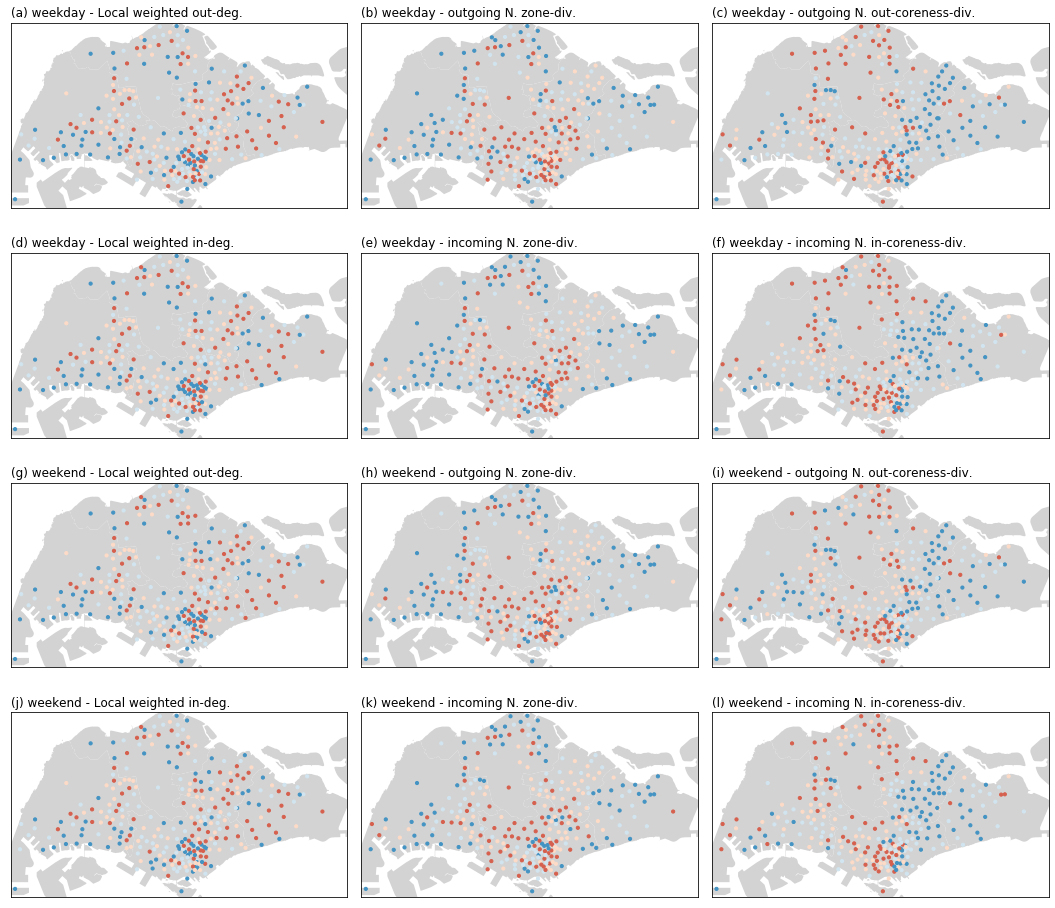

In [19]:
fig, axg = plt.subplots(4, 3, figsize=(15,13), sharey=True, sharex=False)
axs = axg.flatten()

columns = ["out_degree_weekday", "weekday_com_ent_out", "weekday_ksc_ent_out", 
           "in_degree_weekday", "weekday_com_ent_in", "weekday_ksc_ent_in", 
           "out_degree_weekend", "weekend_com_ent_out", "weekend_ksc_ent_out", 
           "in_degree_weekend", "weekend_com_ent_in", "weekend_ksc_ent_in"]

dfs = [subzone4, subzone2, subzone3, subzone4, subzone2, subzone3, subzone4, subzone2, subzone3, subzone4, subzone2, subzone3]

for i in range(len(columns)):
    df = dfs[i]
    col = columns[i]
    ax = axs[i]
    #sns.distplot(df[col], ax=ax, kde=False)
    xx = df["X_ADDR"]
    yy = df["Y_ADDR"]
    s0 = df[col].tolist()
    s1 = quantile(s0)
    cs = [ four_color[c] for c in s1 ]
    ss = [ (s+1)*10 for s in s1 ]
    region.plot(ax=ax, fc="lightgrey")
    ax.scatter(xx, yy, s=10, c=cs)
    

labs = "abcdefghijkl"
labs2 = [ "weekday - Local", "weekday - outgoing N.", "weekday - outgoing N.", 
          "weekday - Local", "weekday - incoming N.", "weekday - incoming N.",
          "weekend - Local", "weekend - outgoing N.", "weekend - outgoing N.", 
          "weekend - Local", "weekend - incoming N.", "weekend - incoming N." ]
xlabs = ["weighted out-deg.", "zone-div.", "out-coreness-div.", 
         "weighted in-deg." , "zone-div.", "in-coreness-div." , 
         "weighted out-deg.", "zone-div.", "out-coreness-div.", 
         "weighted in-deg." , "zone-div.", "in-coreness-div."  ]

for i in range(12):
    ax = axs[i]
    ax.set_title("({}) {} {}".format(labs[i], labs2[i], xlabs[i]), loc="left")
    ax.set_aspect("equal")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim([4500,50000])
    ax.set_ylim([25000,50000])

    
plt.tight_layout()
#plt.savefig("figs/density_and_diversity.png", dpi=100, bbox_inches="tight")

In [20]:
four_color = sns.color_palette("RdBu_r", 4)

In [21]:
sns.set(style="white", font_scale=1.5)

[0.25, 0.5, 0.75, 1.0] [0.025112748034446113, 0.07346919547178, 0.18993102261575753, 1.0]
[0.25, 0.5, 0.75, 1.0] [0.30846701519416997, 0.4700387185230276, 0.6289078281815389, 0.8338498488464692]
[0.25, 0.5, 0.75, 1.0] [0.3460622036968456, 0.5725532342171017, 0.8024726003759679, 0.999987674431568]
[0.25, 0.5, 0.75, 1.0] [0.025409031870323593, 0.07101702607465712, 0.18143871491723262, 1.0]
[0.25, 0.5, 0.75, 1.0] [0.29254976594420995, 0.4524879868319494, 0.6490385359552537, 0.8595635851826637]
[0.25, 0.5, 0.75, 1.0] [0.32601148225695087, 0.54557415757864, 0.7735226644719497, 0.9999961863587901]
[0.25, 0.5, 0.75, 1.0] [0.022248042043385464, 0.07104818024803079, 0.17745503921542552, 1.0]
[0.25, 0.5, 0.75, 1.0] [0.3197677669707505, 0.4464666849668644, 0.6133950239626413, 0.844520094687989]
[0.25, 0.5, 0.75, 1.0] [0.3380976543438276, 0.5262885306986919, 0.782555786029535, 0.9999955731051078]
[0.25, 0.5, 0.75, 1.0] [0.02264804626899613, 0.06982703711909201, 0.17203772440762022, 1.0]
[0.25, 0.5

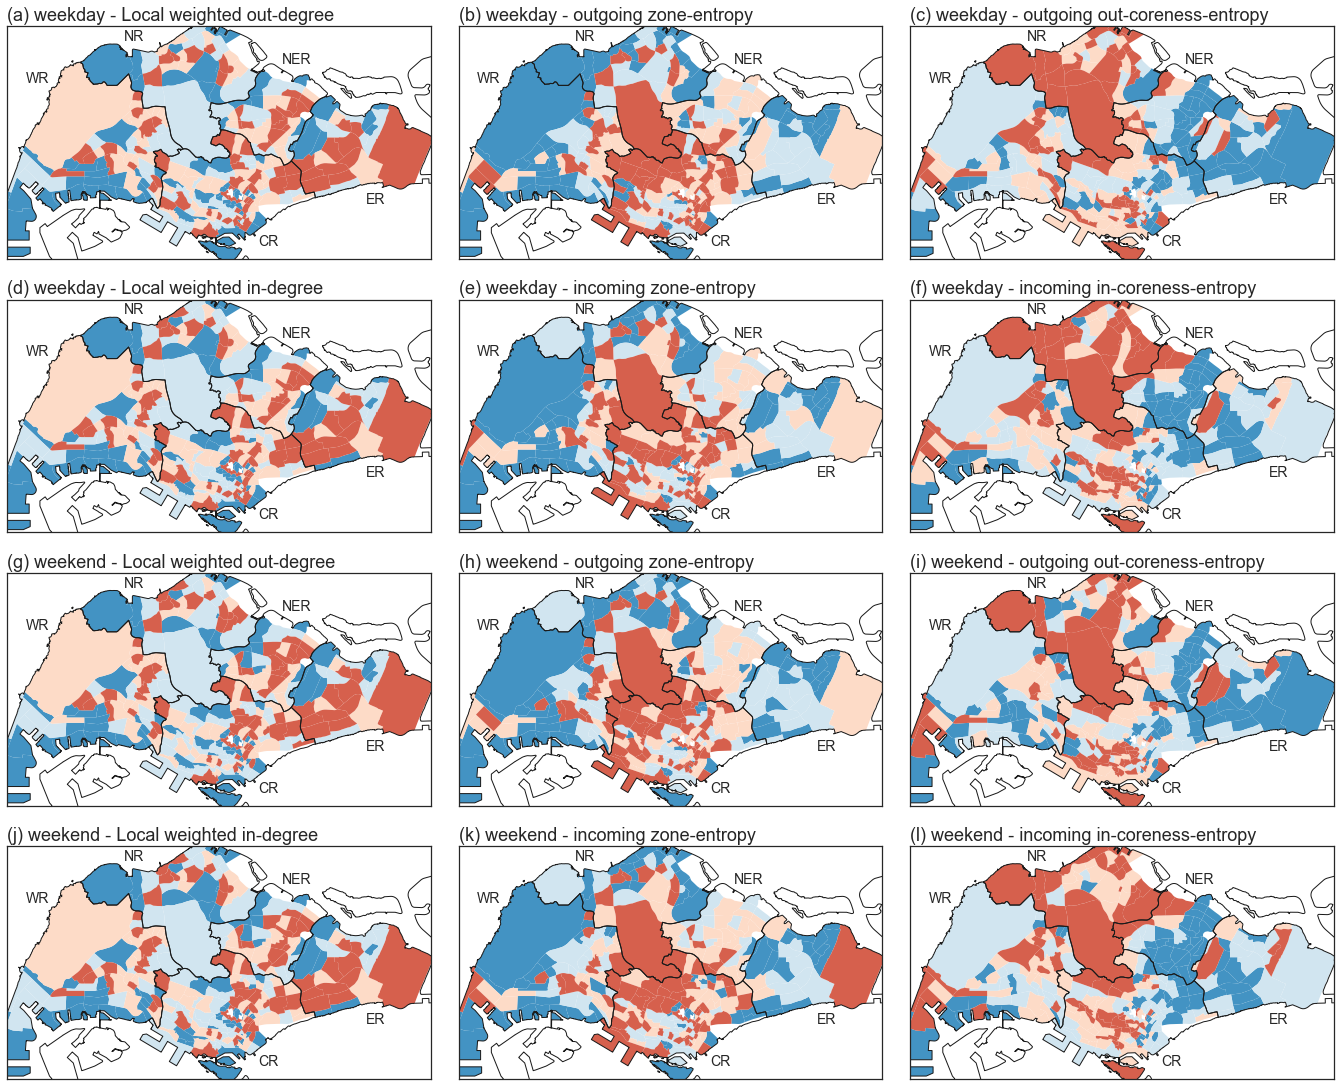

In [22]:
fig, axg = plt.subplots(4, 3, figsize=(19.5,15.5), sharey=True, sharex=False)
axs = axg.flatten()

columns = ["out_degree_weekday", "weekday_com_ent_out", "weekday_ksc_ent_out", 
           "in_degree_weekday", "weekday_com_ent_in", "weekday_ksc_ent_in", 
           "out_degree_weekend", "weekend_com_ent_out", "weekend_ksc_ent_out", 
           "in_degree_weekend", "weekend_com_ent_in", "weekend_ksc_ent_in"]

dfs = [subzone4, subzone2, subzone3, subzone4, subzone2, subzone3, subzone4, subzone2, subzone3, subzone4, subzone2, subzone3]

for i in range(len(columns)):
    df = dfs[i]
    col = columns[i]
    temp = df[[col, "geometry"]].copy()
    ax = axs[i]
    #sns.distplot(df[col], ax=ax, kde=False)
    #xx = df["X_ADDR"]
    #yy = df["Y_ADDR"]
    s0 = temp[col].tolist()
    s1 = quantile(s0)
    temp["cat"] = s1
    for i in range(4):
        temp2 = temp[temp["cat"]==i]
        temp2.plot(ax=ax, color=four_color[i], lw=0, ec="none")
        #print(type(temp2))
        #break
    #break

labs = "abcdefghijkl"
labs2 = [ "weekday - Local", "weekday - outgoing", "weekday - outgoing", 
          "weekday - Local", "weekday - incoming", "weekday - incoming",
          "weekend - Local", "weekend - outgoing", "weekend - outgoing", 
          "weekend - Local", "weekend - incoming", "weekend - incoming" ]
xlabs = ["weighted out-degree", "zone-entropy", "out-coreness-entropy", 
         "weighted in-degree" , "zone-entropy", "in-coreness-entropy" , 
         "weighted out-degree", "zone-entropy", "out-coreness-entropy", 
         "weighted in-degree" , "zone-entropy", "in-coreness-entropy"  ]

for i in range(12):
    ax = axs[i]
    ax.set_title("({}) {} {}".format(labs[i], labs2[i], xlabs[i]), loc="left")
    ax.set_aspect("equal")
    region.plot(ax=ax, fc="none", ec="k")
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim([4500,50000])
    ax.set_ylim([25000,50000])
    ax.annotate("WR", (9000, 44000), ha="right", fontsize=14)
    ax.annotate("NR", (17000, 48500), ha="left", fontsize=14)
    ax.annotate("NER", (34000, 46000), ha="left", fontsize=14)
    ax.annotate("ER", (43000, 31000), ha="left", fontsize=14)
    ax.annotate("CR", (31500, 26500), ha="left", fontsize=14)

cpatches = []
clabs = ["low", "mid-low", "mid-high", "high"]
for i in range(4):
    patch = mpatches.Patch(color=four_color[i], label=clabs[i])
    cpatches.append(patch)
leg = axg[-1][0].legend(handles=cpatches, loc="lower left", ncol=4, bbox_to_anchor=(0.05, -0.25))
leg.set_in_layout(False)
plt.tight_layout()
plt.savefig("../b-calculation/figs/density_and_diversity_map.png", bbox_extra_artists=(leg,), dpi=300, bbox_inches="tight")

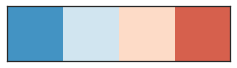

In [23]:
sns.palplot(sns.color_palette("RdBu_r", 4))

In [24]:
merge = pd.merge(com_res, ks_res, left_on="node", right_on="node")
merge.head()

,node,level_1_weekday,level_1_weekend,weekday_com_ent_in,weekday_com_ent_out,weekend_com_ent_in,weekend_com_ent_out,weekday_in_core,weekday_out_core,weekend_in_core,weekend_out_core,weekday_in_core_lvl,weekday_out_core_lvl,weekend_in_core_lvl,weekend_out_core_lvl,weekday_ksc_ent_in,weekday_ksc_ent_out,weekend_ksc_ent_in,weekend_ksc_ent_out
0,NEWTON CIRCUS,1,1,0.660688,0.618028,0.649526,0.595412,7385,7318,6252,6239,1,1,1,1,0.188306,0.225681,0.183369,0.190708
1,BOULEVARD,1,1,0.778886,0.751121,0.780433,0.728454,7385,7318,6252,6239,1,1,1,1,0.428556,0.332661,0.438248,0.328086
2,CHINATOWN,1,1,0.746530,0.754246,0.714408,0.728074,7385,7318,6252,6239,1,1,1,1,0.173694,0.416731,0.187989,0.461814
3,MOULMEIN,1,1,0.744090,0.732001,0.710449,0.652052,7385,7318,6252,6239,1,1,1,1,0.275944,0.252602,0.284374,0.273916
4,CITY HALL,1,1,0.759932,0.761807,0.763656,0.770766,7385,7318,6252,6239,1,1,1,1,0.237001,0.364608,0.197243,0.317769


In [25]:
merge.columns

Index(['node', 'level_1_weekday', 'level_1_weekend', 'weekday_com_ent_in',
       'weekday_com_ent_out', 'weekend_com_ent_in', 'weekend_com_ent_out',
       'weekday_in_core', 'weekday_out_core', 'weekend_in_core',
       'weekend_out_core', 'weekday_in_core_lvl', 'weekday_out_core_lvl',
       'weekend_in_core_lvl', 'weekend_out_core_lvl', 'weekday_ksc_ent_in',
       'weekday_ksc_ent_out', 'weekend_ksc_ent_in', 'weekend_ksc_ent_out'],
      dtype='object')

In [26]:
xcols = ['weekday_com_ent_in', 'weekday_com_ent_out', 'weekend_com_ent_in', 'weekend_com_ent_out']
ycols = ['weekday_ksc_ent_in', 'weekday_ksc_ent_out', 'weekend_ksc_ent_in', 'weekend_ksc_ent_out']

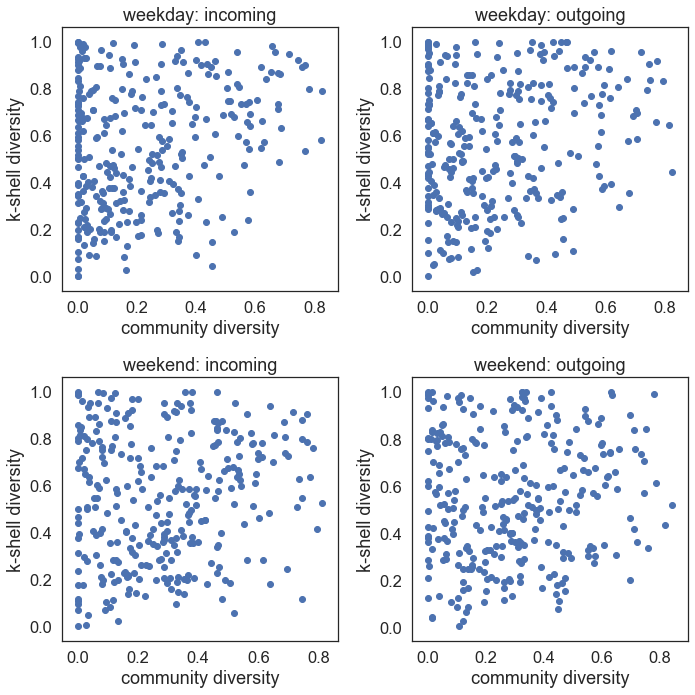

In [24]:
fig, axg = plt.subplots(2,2, figsize=(10,10))
axs = axg.flatten()

labs = "abcd"
labs2 = ["incoming", "outgoing", "incoming", "outgoing"]
for i in range(4):
    ax = axs[i]
    xc = xcols[i]
    yc = ycols[i]
    ax.scatter( merge[xc], merge[yc] )
    ax.set_title("{}: {}".format(xc[:7], labs2[i]))
    ax.set_xlabel("community diversity")
    ax.set_ylabel("k-shell diversity")

plt.tight_layout()

In [11]:
breaks = jenkspy.jenks_breaks(subzone2["weekday_com_ent_in"], nb_class=6)
breaks = [ round(v,4) for v in breaks ]
breaks#[:-1]

[0.0, 0.123, 0.275, 0.4079, 0.5628, 0.7701, 0.9998]